## Análise Rotatividade de Clientes de Telecomunicações

<center>

<p><img src=https://fia.com.br/wp-content/uploads/2022/06/cr.jpg" alt="Imagem_Churn" width='45%'; height: auto;></p>

</center>

A base de dados possui informações sobre:

- Clientes que saíram no último mês – a coluna é chamada de Churn
- Serviços nos quais cada cliente se inscreveu – telefone, múltiplas linhas, internet, segurança online, backup online, proteção de dispositivos, suporte técnico e streaming de TV e filmes
- Informações da conta do cliente – há quanto tempo ele é cliente, contrato, forma de pagamento, faturamento sem papel, cobranças mensais e cobranças totais
- Informações demográficas sobre clientes – sexo, faixa etária e se possuem companheiros e dependentes

Com essa base vamos realizar os tratamentos iniciais e analisar quais os fatores podem ter levado o cliente a cancelar

A base de dados foi extraída do [**Kaggle**](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

## **Dicionário de Dados:**

- customerID = Código Identificador do cliente
- gender = Gênero do cliente (Homem, Mulher)
- SeniorCitizen = Se o cliente é idoso (1 para sim e 0 para não)
- Partner = Se o cliente tem parceiro (Sim, Não)
- Dependents = Se o cliente tem dependentes (Sim, Não)
- tenure = Número de meses que o cliente permaneceu na empresa
- PhoneService = Se o cliente possui serviço telefônico ou não (Sim, Não)
- MultipleLines = Se o cliente tem várias linhas (Sim, Não, Não há serviço telefônico)
- InternetService = Provedor de serviços de Internet do cliente (DSL, Fibra óptica, Não)
- OnlineSecurity = Se o cliente tem segurança online (Sim, Não, Não há serviço de internet)
- OnlineBackup = Se o cliente possui backup online (Sim, Não, Sem serviço de internet)
- DeviceProtection = Se o cliente possui proteção de dispositivo (Sim, Não, Sem serviço de internet)
- TechSupport = Se o cliente tem suporte técnico (Sim, Não, Sem serviço de internet)
- StreamingTV = Se o cliente possui streaming de TV (Sim, Não, Sem serviço de internet)
- StreamingMovies = Se o cliente possui streaming de filme(Sim, Não, Não há serviço de internet)
- Contract = O prazo do contrato do cliente (mês a mês, um ano, dois anos)
- PaperlessBilling = Se o cliente tem cobrança sem papel(Sim, Não)
- PaymentMethod = A forma de pagamento do cliente (cheque eletrônico, cheque enviado pelo correio, transferência bancária)
- MonthlyCharges = O valor cobrado do cliente mensalmente
- TotalCharges = O valor total cobrado do cliente
- Churn = Se o cliente cancelou (Sim ou Não)

## **Importando bibliotecas e base de dados**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Telco_Customer_Churn.csv')

## **Análise Exploratória dos dados**


Vamos analisar a base, nome das colunas, tipo e se possui valores nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Podemos avaliar que temos uma base sem valores nulos, com 7.043 observações e em sua maioria com informações do tipo texto, seguidas por inteiros e decimais.

Porém, podemos observar que as informações da coluna "TotalCharges" que se refere aos valores totais pagos pelos clientes não está no formato de número e pode impactar nas análises, neste caso já iremos fazer os devidos tratamentos.

In [ ]:
#Convertendo o tipo de dados da coluna para formato float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype(float)

Vamos visualizar as informações novamente

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Após o tratamento, a coluna possui 7032 valores não nulos ou seja, temos 11 valores nulos nesta coluna

In [ ]:
#vamos verificar quais são essas colunas
vazias = df[df['TotalCharges'].isnull()]
display(vazias)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Podemos notar que ficaram com valores nulos pois todas estão com a coluna "ternure" que é a quantidade de meses que o cliente permaneceu na empresa, zerados. Desta forma, vamos realizar uma operação para tratamento.

In [ ]:
#multiplicando a quantidade de meses pelo valor mensal e atribuindo em uma nova coluna chamada TotalChargesTratado
df['TotalChargesTratado'] = df['tenure'] * df['MonthlyCharges']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7043 non-null   object 
 1   gender               7043 non-null   object 
 2   SeniorCitizen        7043 non-null   int64  
 3   Partner              7043 non-null   object 
 4   Dependents           7043 non-null   object 
 5   tenure               7043 non-null   int64  
 6   PhoneService         7043 non-null   object 
 7   MultipleLines        7043 non-null   object 
 8   InternetService      7043 non-null   object 
 9   OnlineSecurity       7043 non-null   object 
 10  OnlineBackup         7043 non-null   object 
 11  DeviceProtection     7043 non-null   object 
 12  TechSupport          7043 non-null   object 
 13  StreamingTV          7043 non-null   object 
 14  StreamingMovies      7043 non-null   object 
 15  Contract             7043 non-null   o

Visualização das 5 primeiras informações do Dataframe

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalChargesTratado
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1936.30
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40


## Comparativo entre cancelamento e Gênero

In [ ]:
comparativo_genero = df[['Churn', 'gender']].value_counts().reset_index(name='count')
print(comparativo_genero)

  Churn  gender  count
0    No    Male   2625
1    No  Female   2549
2   Yes  Female    939
3   Yes    Male    930


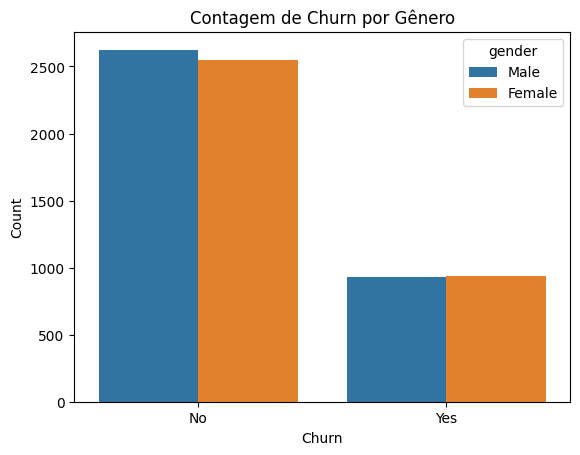

In [ ]:
#criando o gráfico
sns.barplot(x='Churn', y='count', hue='gender', data=comparativo_genero)

plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Contagem de Churn por Gênero')
plt.show()

In [ ]:
display(comparativo_genero)

,Churn,gender,count
0,No,Male,2625
1,No,Female,2549
2,Yes,Female,939
3,Yes,Male,930


Com esse gráfico e com a tabela, podemos analisar que não há uma discrepância significativa na taxa de churn entre os gêneros, as quantidades para ambos estão bem próximas.

## Proporção do Cancelamento

In [ ]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
#percentual de cancelamento/ não cancelamento
perc_churn = df['Churn'].value_counts(normalize = True)

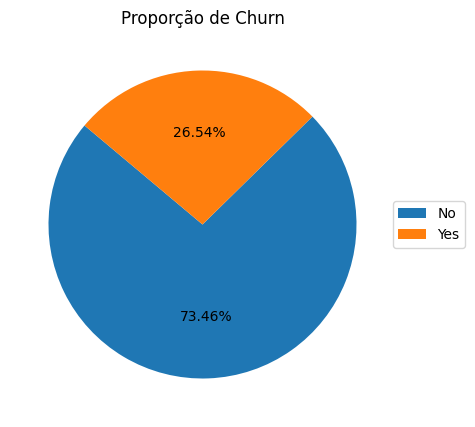

In [ ]:
#criando o gráfico

#criando a figura com 5 polegadas largura e 5 altura
plt.figure(figsize=(5, 5))
#definindo o tipo de gráfico, ede onde estão vindo as informações e formato
plt.pie(perc_churn, autopct='%.2f%%', startangle=140)
#titulo do gráfico
plt.title('Proporção de Churn')
#legenda e ajuste na exibição
plt.legend(perc_churn.index, loc='center right', bbox_to_anchor=(1.2, 0.5))
#exibindo o gráfico
plt.show()

Com o Gráfico proporção de Churn, podemos visualizar que é bem representativo o percentual de rotatividade dos clientes.

## Filtrando apenas os clientes que cancelaram os serviços para entender qual é o seu perfil

In [ ]:
#filtrando e atribuindo na variave 'churn_yes'
churn_yes = df[df['Churn'] == 'Yes']

## Proporção do cancelamento por periodo de Contato

In [ ]:
#percentual do periodo de contrato
perc_contract = churn_yes['Contract'].value_counts(normalize = True)

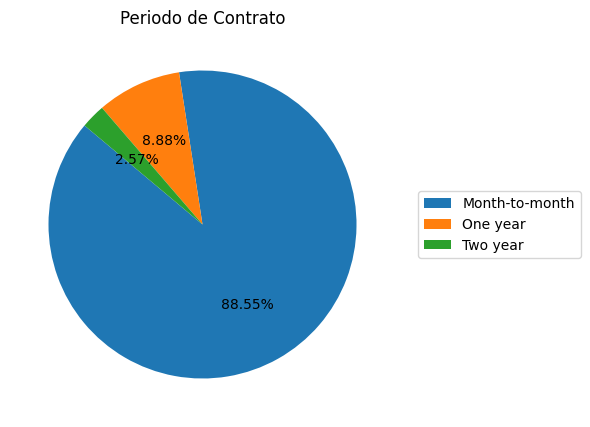

In [ ]:
#criando o gráfico
plt.figure(figsize=(5, 5))
plt.pie(perc_contract, autopct='%.2f%%', startangle=140)
plt.title('Periodo de Contrato')
plt.legend(perc_contract.index, loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.show()

O tipo de contrato com maior cancelamento foi o mensal e o menor, contratos para dois anos. Com isso podemos entender que quanto menor o periodo do contrato, mais chance do cliente cancelar.

## Proporção do cancelamento por método de pagamento

In [ ]:
#percentual por método de pagamento
perc_payment = churn_yes['PaymentMethod'].value_counts(normalize = True)

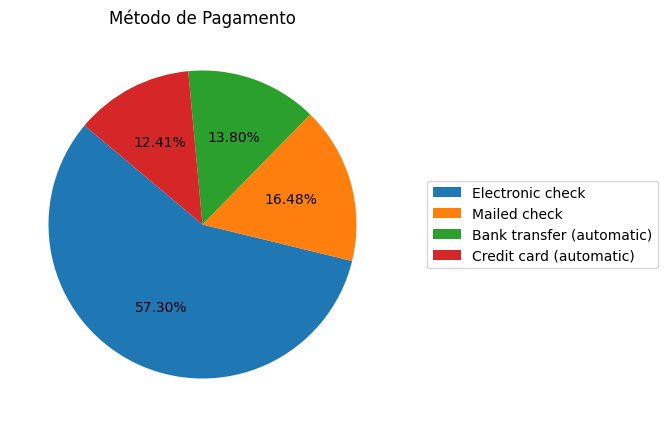

In [ ]:
#criando o gráfico
plt.figure(figsize=(5, 5))
plt.pie(perc_payment, autopct='%.2f%%', startangle=140)
plt.title('Método de Pagamento')
plt.legend(perc_payment.index, loc='center right', bbox_to_anchor=(1.7, 0.5))
plt.show()

O método de pagamento com maior cancelamento foi o check eletronico. Se destacando muito em relação aos demais métodos, isso gera um alerta se é um ponto que levou o cliente a cancelar.

## **Conclusão**

Após análises, evidencia-se que os clientes que optam por contratos mensais são mais suscetíveis a cancelamentos. Além disso, destaca-se que o método de pagamento mais prevalente para estes cancelamentos é o uso de cheques eletrônicos.

Diante disso, sugere-se a tentar fechar contratos com períodos mais longos, visando possivelmente reduzir a taxa de cancelamento. É recomendável uma investigação mais aprofundada sobre a possível insatisfação ou problemas associados ao método de pagamento com cheques eletrônicos, visando aprimorar a experiência do cliente e potencialmente mitigar o cancelamento.